## Introduction 

The research, based on CDC BRDSS 2021, highlights that 34.1 million adults in the United States, constituting 10.5% of the adult population, are affected by diabetes. The study aims to delve into the factors contributing to the risk of diabetes. To achieve this, a classification model is employed to predict the diabetes status of individuals based on specific parameters.

The case study utilizes a diabetes dataset sourced from Kaggle (https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset). This dataset comprises 67,136 survey responses collected in 2021 through the Behavioral Risk Factor Surveillance System (BRFSS) by the Centers for Disease Control and Prevention (CDC). The dataset is well-structured, presenting a balanced distribution with a 50-50 split between respondents with no diabetes and those with either prediabetes or diabetes. The target variable, Diabetes_binary, features two classes: 0 represents no diabetes, and 1 indicates prediabetes or diabetes. With 22 feature variables, this dataset offers a comprehensive basis for analysis.


### Independent Variables 

- Diabetes_binary (Target Variable) - binary variable indicating the presence (1) or absence (0) of diabetes.
- HighBP - binary variable indicating the presence (1) or absence (0) of high blood pressure.
- HighChol - binary variable indicating the presence (1) or absence (0) of high cholesterol.
- CholCheck - binary variable indicating whether cholesterol is checked (1) or not (0).
- BMI - Body Mass Index, a measure of body fat based on height and weight.
- Smoker - binary variable indicating smoking status, with 1 for smokers and 0 for non-smokers.
- Stroke - binary variable indicating the presence (1) or absence (0) of a history of stroke.
- HeartDiseaseorAttack - binary variable indicating the presence (1) or absence (0) of heart disease or heart attack.
- PhysActivity - binary variable indicating engagement (1) or lack of engagement (0) in physical activity.
- Fruits - binary variable indicating regular consumption (1) or non-consumption (0) of fruits.
- Veggies - binary variable indicating regular consumption (1) or non-consumption (0) of vegetables.
- HvyAlcoholConsump - binary variable indicating heavy alcohol consumption (1) or not (0).
- AnyHealthcare - binary variable indicating the use (1) or non-use (0) of any healthcare services.
- NoDocbcCost - binary variable indicating the absence (1) of presence (0) of doctor visits due to cost.
- GenHlth - general health status, represented by a numeric scale (1-5).
- MentHlth - mental health status, represented by a numeric scale (0-30).
- PhysHlth - physical health status, represented by a numeric scale (0-30).
- DiffWalk - binary variable indicating difficulty (1) or ease (0) in walking.
- Sex - binary variable indicating gender, with 1 for male and 0 for female.
- Age - age of the survey respondents, represented in years.
- Education - education level of the respondents, represented by a numeric scale (1-6).
- Income - household income level, represented by a numeric scale.

## Necessary Libraries & Modules  

In [7]:
!pip install xgboost

In [1]:
# Math & Data Processing
import numpy as np 
import pandas as pd 

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import pylab 

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.feature_selection import mutual_info_classif 


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import xgboost as xgb

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn import metrics

## Data Importation 

In [2]:
df = pd.read_csv(r"C:\Users\TzeShuan\OneDrive\Documents\LinkedIn Learning\Data Analysis Reports\Diabetes Classification ML Analysis\diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0


## Data Understanding 

In [137]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67136 non-null  float64
 1   HighBP                67136 non-null  int64  
 2   HighChol              67136 non-null  float64
 3   CholCheck             67136 non-null  int64  
 4   BMI                   67136 non-null  float64
 5   Smoker                67136 non-null  float64
 6   Stroke                67136 non-null  float64
 7   HeartDiseaseorAttack  67136 non-null  float64
 8   PhysActivity          67136 non-null  int64  
 9   Fruits                67136 non-null  int64  
 10  Veggies               67136 non-null  int64  
 11  HvyAlcoholConsump     67136 non-null  int64  
 12  AnyHealthcare         67136 non-null  int64  
 13  NoDocbcCost           67136 non-null  float64
 14  GenHlth               67136 non-null  float64
 15  MentHlth           

In [139]:
# Transpose the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,67136.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,67136.0,0.548320,0.497663,0.0,0.0,1.0,1.0,1.0
HighChol,67136.0,0.500238,0.500004,0.0,0.0,1.0,1.0,1.0
CholCheck,67136.0,0.976227,0.152341,0.0,1.0,1.0,1.0,1.0
BMI,67136.0,30.288340,7.095737,12.0,26.0,29.0,34.0,99.0
Smoker,67136.0,0.440151,0.496409,0.0,0.0,0.0,1.0,1.0
Stroke,67136.0,0.058866,0.235375,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,67136.0,0.136633,0.343462,0.0,0.0,0.0,0.0,1.0
PhysActivity,67136.0,0.717260,0.450334,0.0,0.0,1.0,1.0,1.0
Fruits,67136.0,0.605919,0.488656,0.0,0.0,1.0,1.0,1.0


In [140]:
def summary(df): 
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing_num'] = df.isna().sum()
    summary_df['missing_%'] = ((df.isna().sum())/len(df)) *100
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing_num,missing_%,unique,count
Diabetes_binary,float64,0,0.000000,2,67136
HighBP,int64,0,0.000000,2,67136
HighChol,float64,0,0.000000,2,67136
CholCheck,int64,0,0.000000,2,67136
BMI,float64,0,0.000000,79,67136
Smoker,float64,0,0.000000,2,67136
Stroke,float64,0,0.000000,2,67136
HeartDiseaseorAttack,float64,0,0.000000,2,67136
PhysActivity,int64,0,0.000000,2,67136
Fruits,int64,0,0.000000,2,67136


In [141]:
# Check and drop duplicated data 
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
67131    False
67132    False
67133    False
67134    False
67135    False
Length: 67136, dtype: bool>

In [142]:
df.shape

(67136, 22)

## Exploratory Data Analysis 

### Boxplot

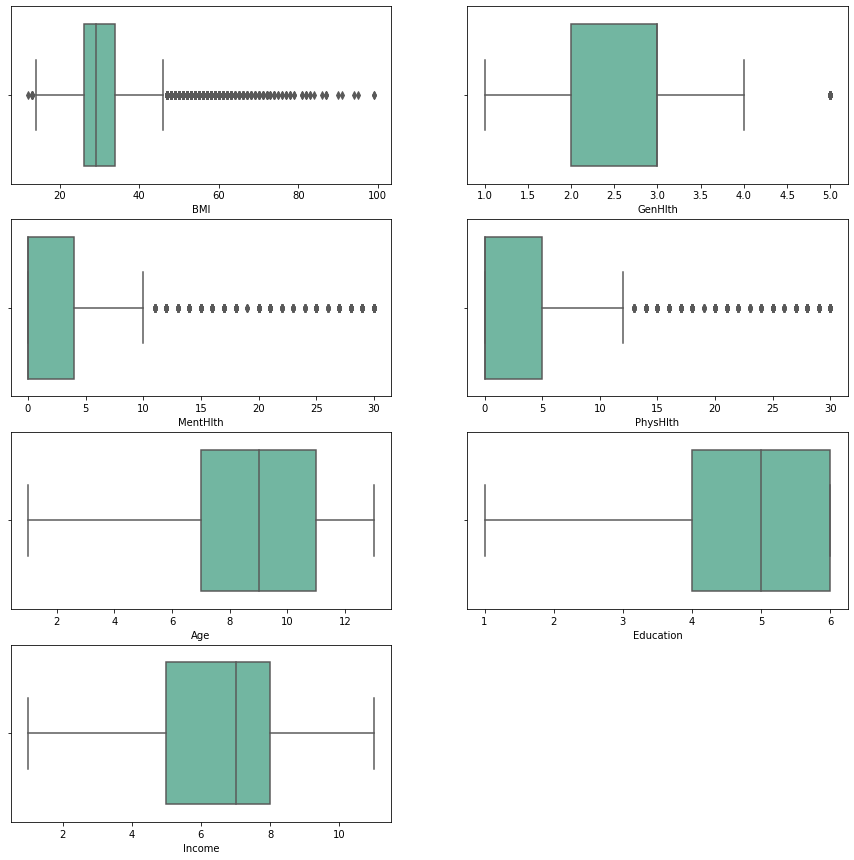

In [143]:
# Check the outliers 
plt.figure(figsize = (15,15))
for i, col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 
                         'Age', 'Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df, palette='Set2')
plt.show()

### Age Distribution 

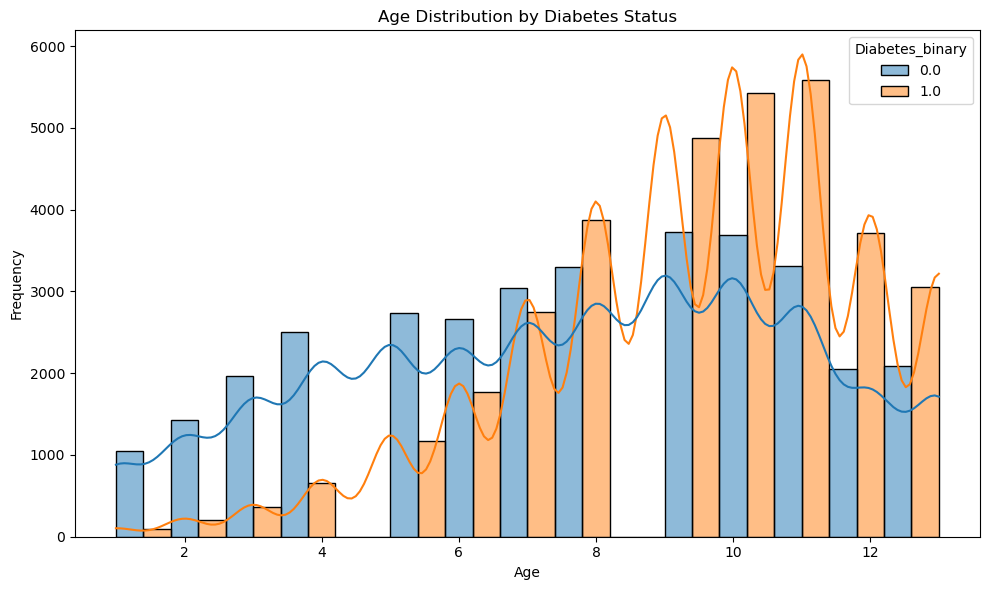

In [144]:
# Set the figure size and dots per inch (dpi)
plt.figure(figsize=(10, 6), dpi=100)
# Create a histogram and KDE plot for the 'Age' column
sns.histplot(data=df, x='Age', hue = 'Diabetes_binary', 
             bins=30, kde=True, multiple="dodge", binwidth=.8)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The plot suggests that the age range with a higher likelihood of children developing diabetes is between 9 to 11 years old.

### BMI Distribution

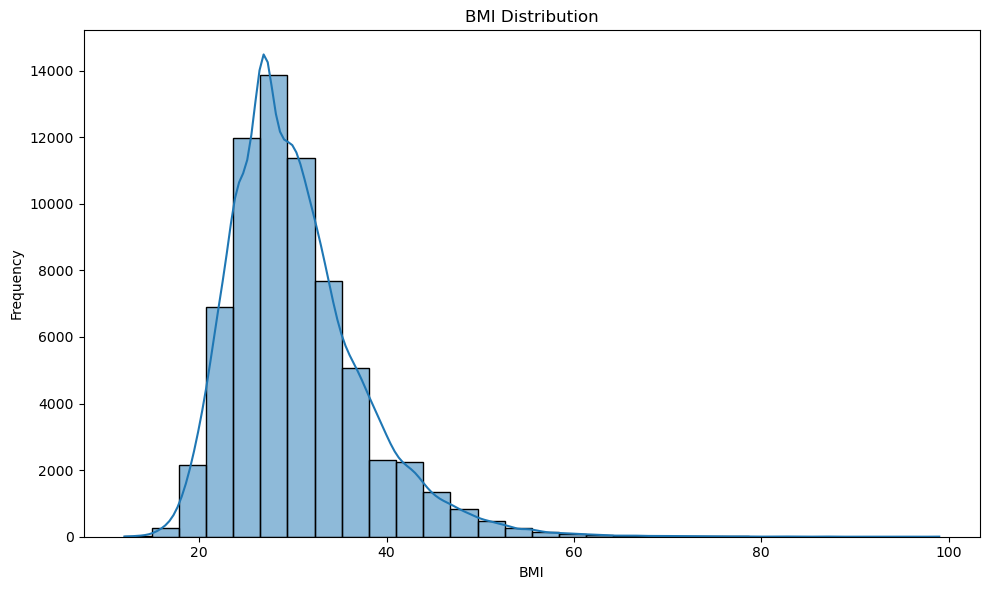

In [145]:
plt.figure(figsize=(10, 6), dpi=100)
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Distribution of Education Level 

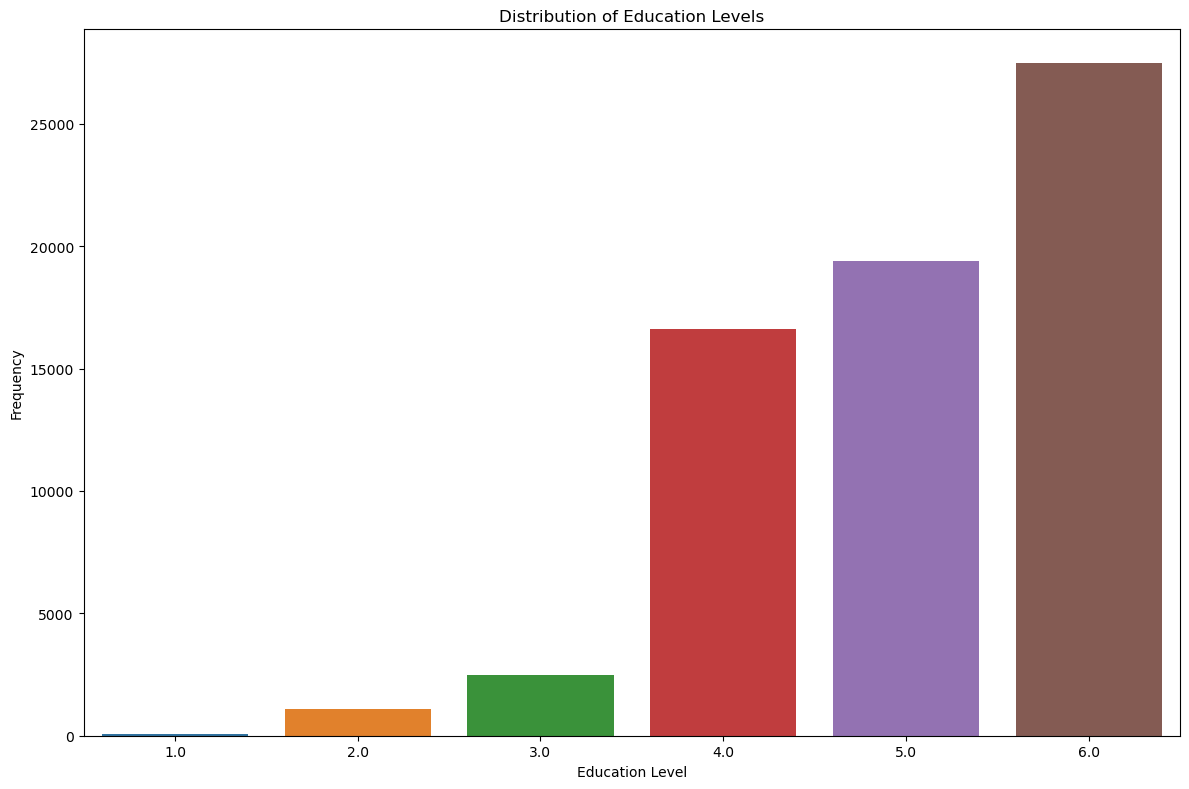

In [146]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Income Distribution by Diabetes Status

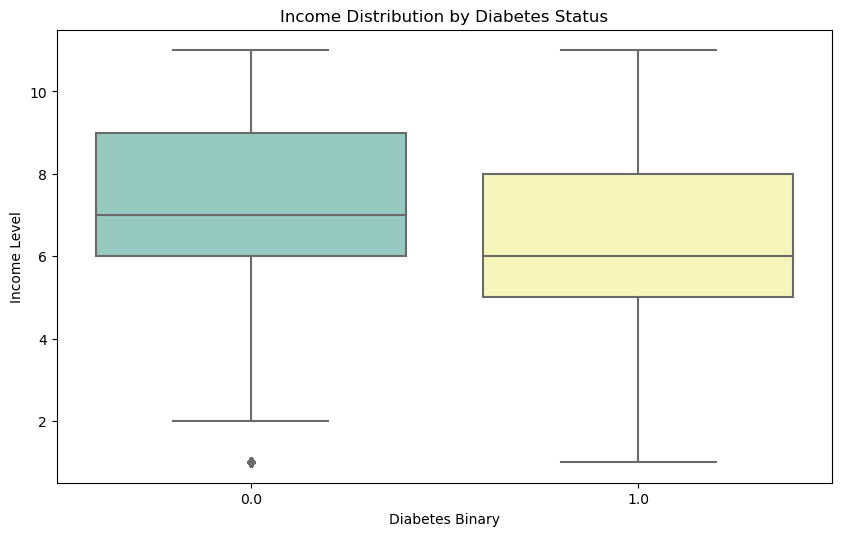

In [147]:
plt.figure(figsize=(10, 6), dpi=100)

# Create a box plot using Seaborn
sns.boxplot(x='Diabetes_binary', y='Income', data=df, palette='Set3')

# Set the title of the plot
plt.title('Income Distribution by Diabetes Status')

# Set labels for the x and y axes
plt.xlabel('Diabetes Binary')
plt.ylabel('Income Level')

# Show the plot
plt.show()


It generally indicates that the median income level of diabetes patients is lower compared to those without diabetes.

### Diabetes Status by Sex 

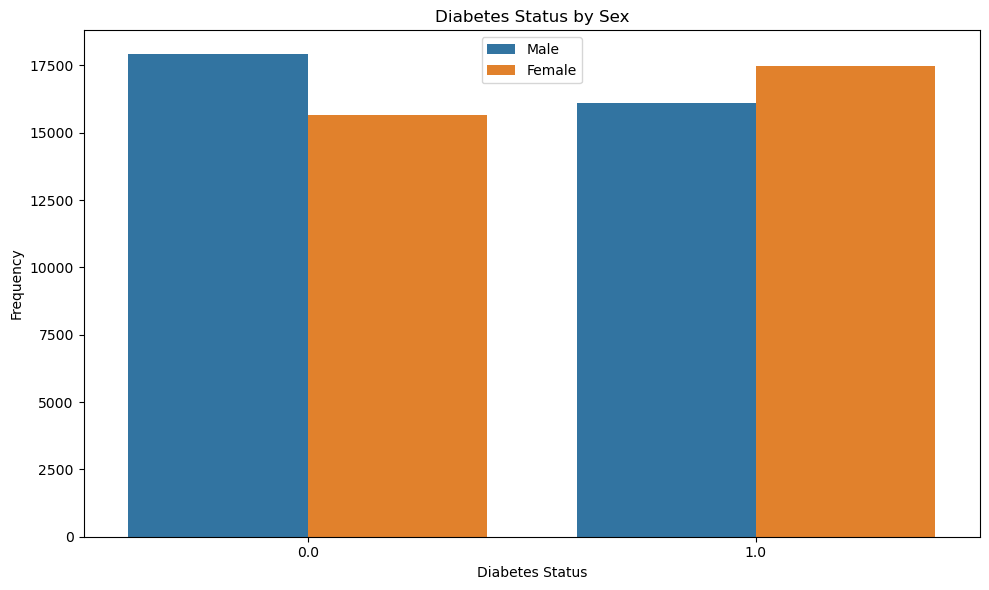

In [148]:
plt.figure(figsize=(10, 6), dpi=100)

sns.countplot(data=df, x='Diabetes_binary', hue = 'Sex')
plt.title('Diabetes Status by Sex')
plt.xlabel('Diabetes Status')
plt.ylabel('Frequency')
plt.legend(labels = ['Male', 'Female'])
plt.tight_layout()
plt.show()

### Correlation Heatmap 

<function matplotlib.pyplot.show(close=None, block=None)>

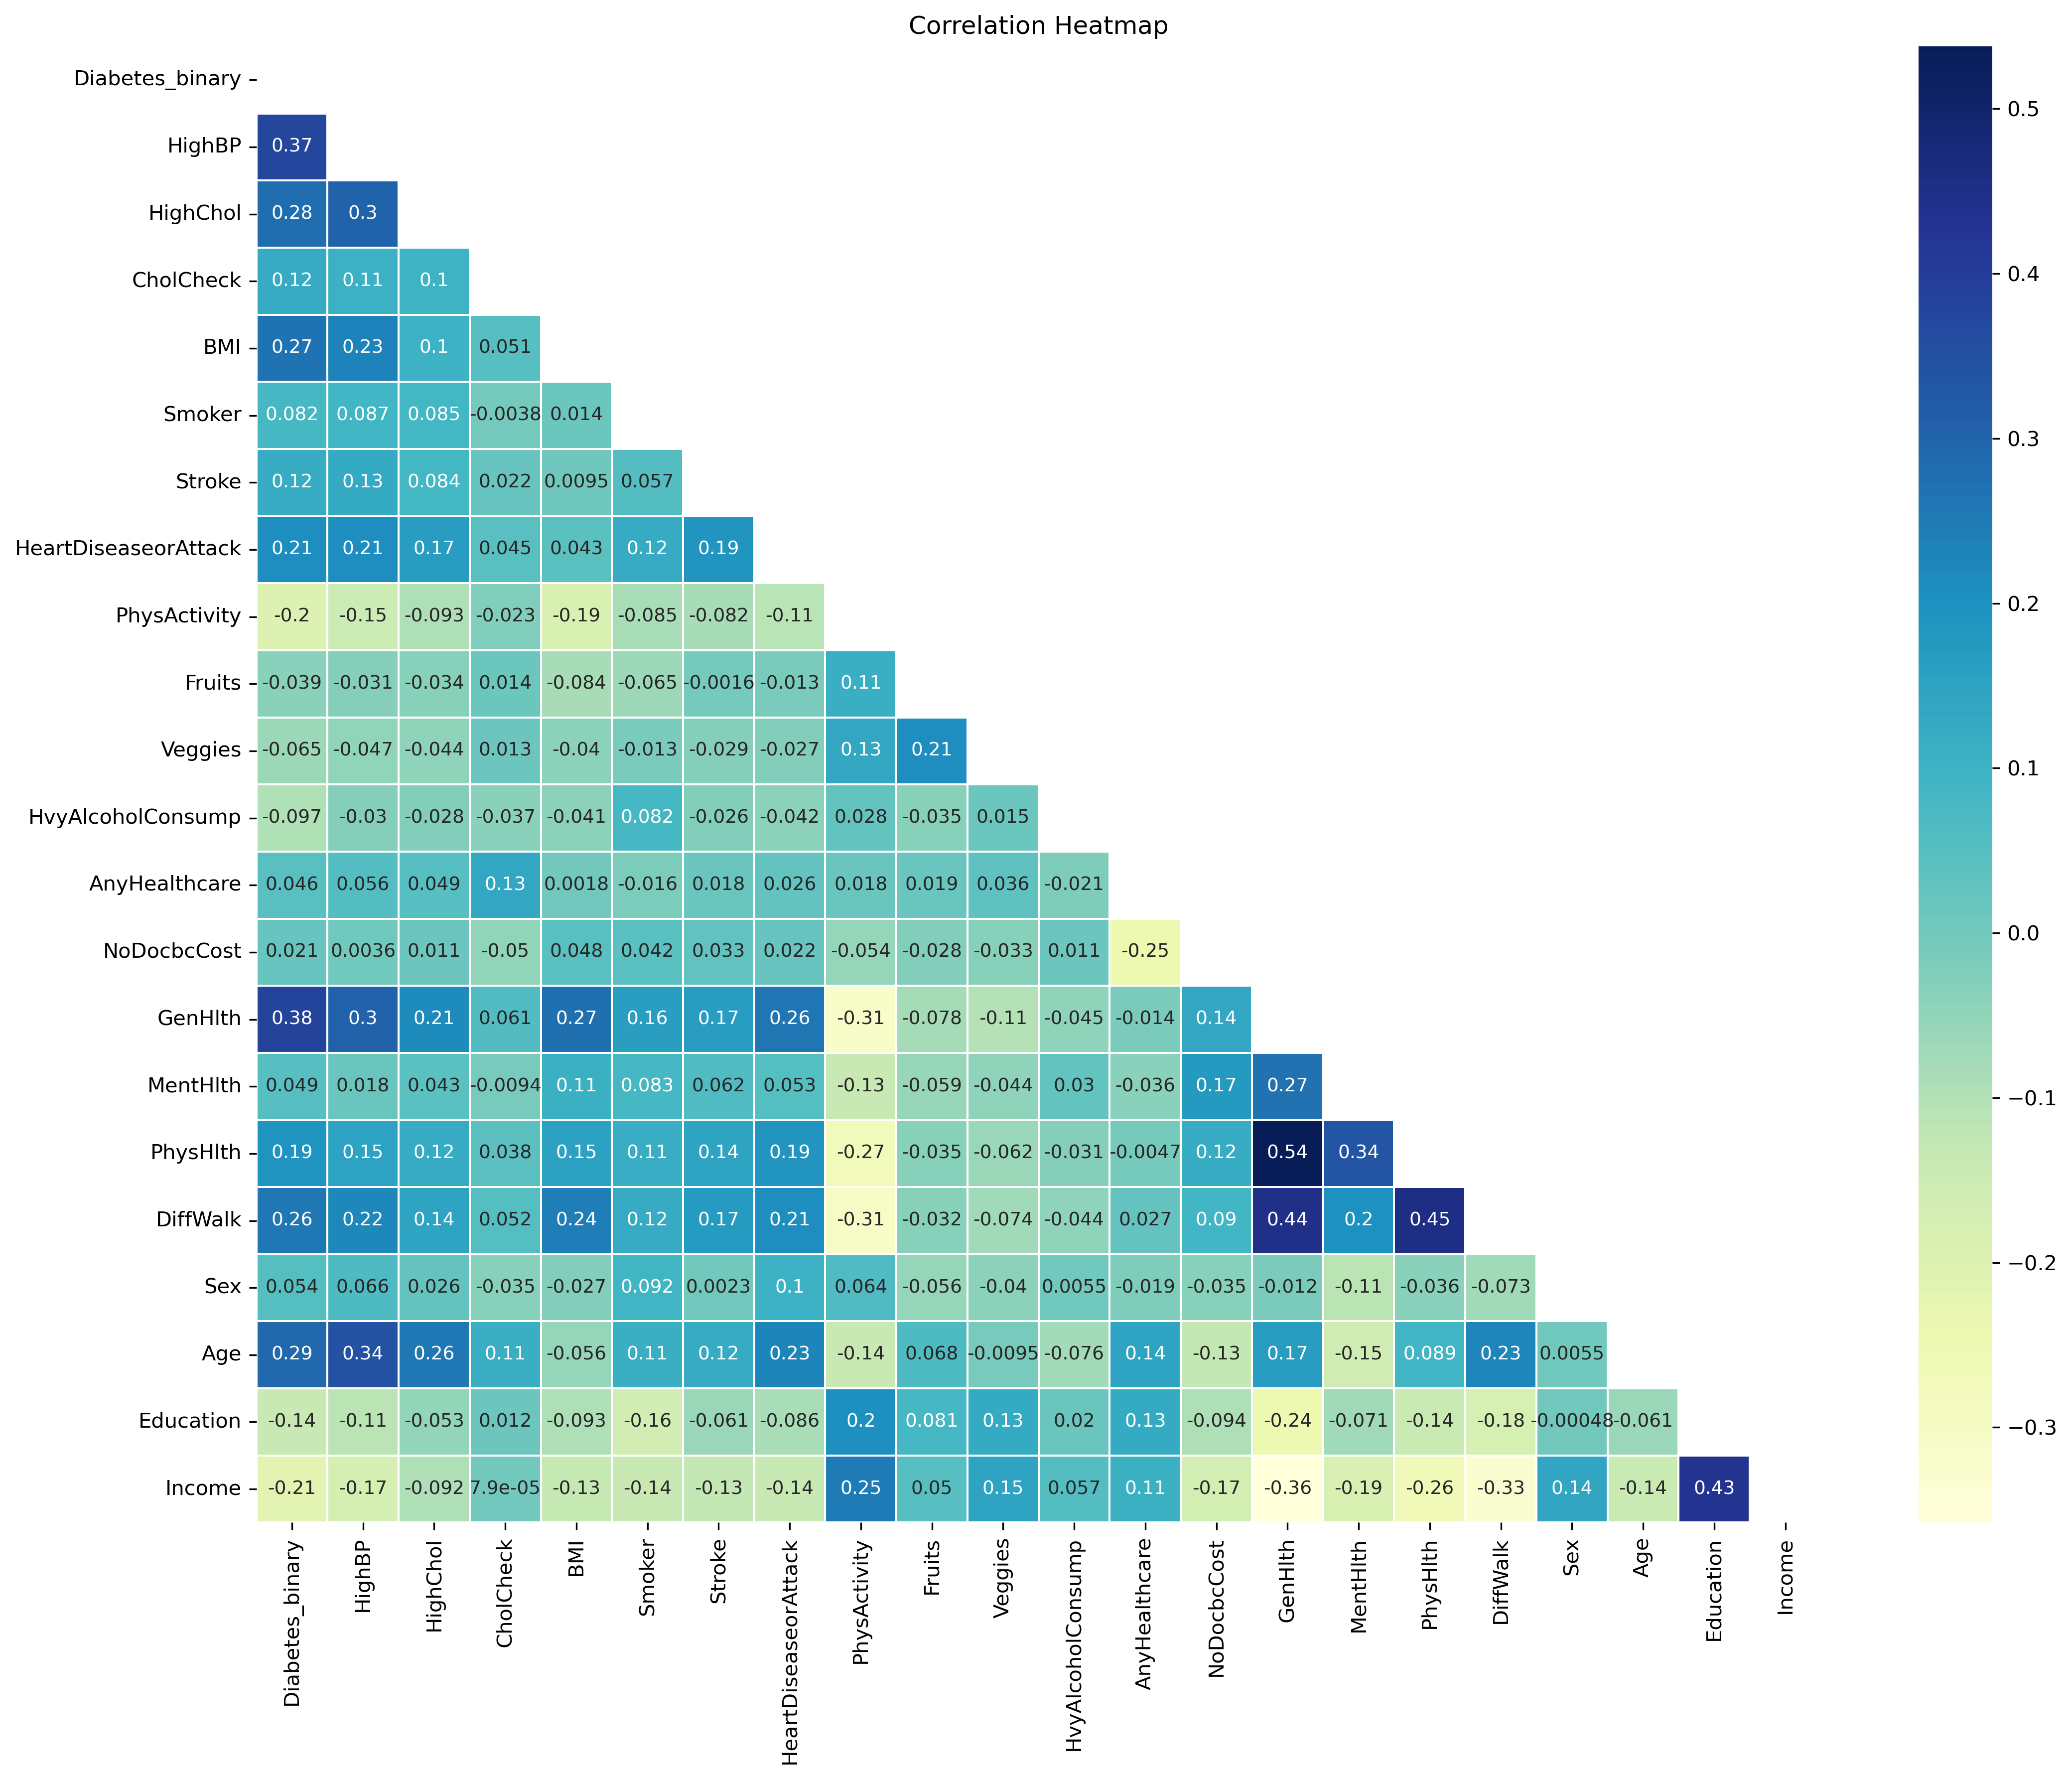

In [149]:
plt.figure(figsize=(15, 12), dpi=300)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu', 
            linewidth=.5, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show

The correlation heatmap reveals noteworthy patterns. Notably, GenHlth and PhysHlth exhibit a moderately strong positive correlation, while PhysHlth and DiffWalk display a rather robust positive correlation. Education demonstrates a strong positive correlation with income level. Interestingly, GenHlth demonstrates a negative strong relationship with income, mirroring similar patterns with GenHlth and PhysActivity, as well as PhysActivity and DiffWalk.

### Bar Plot for binary variables

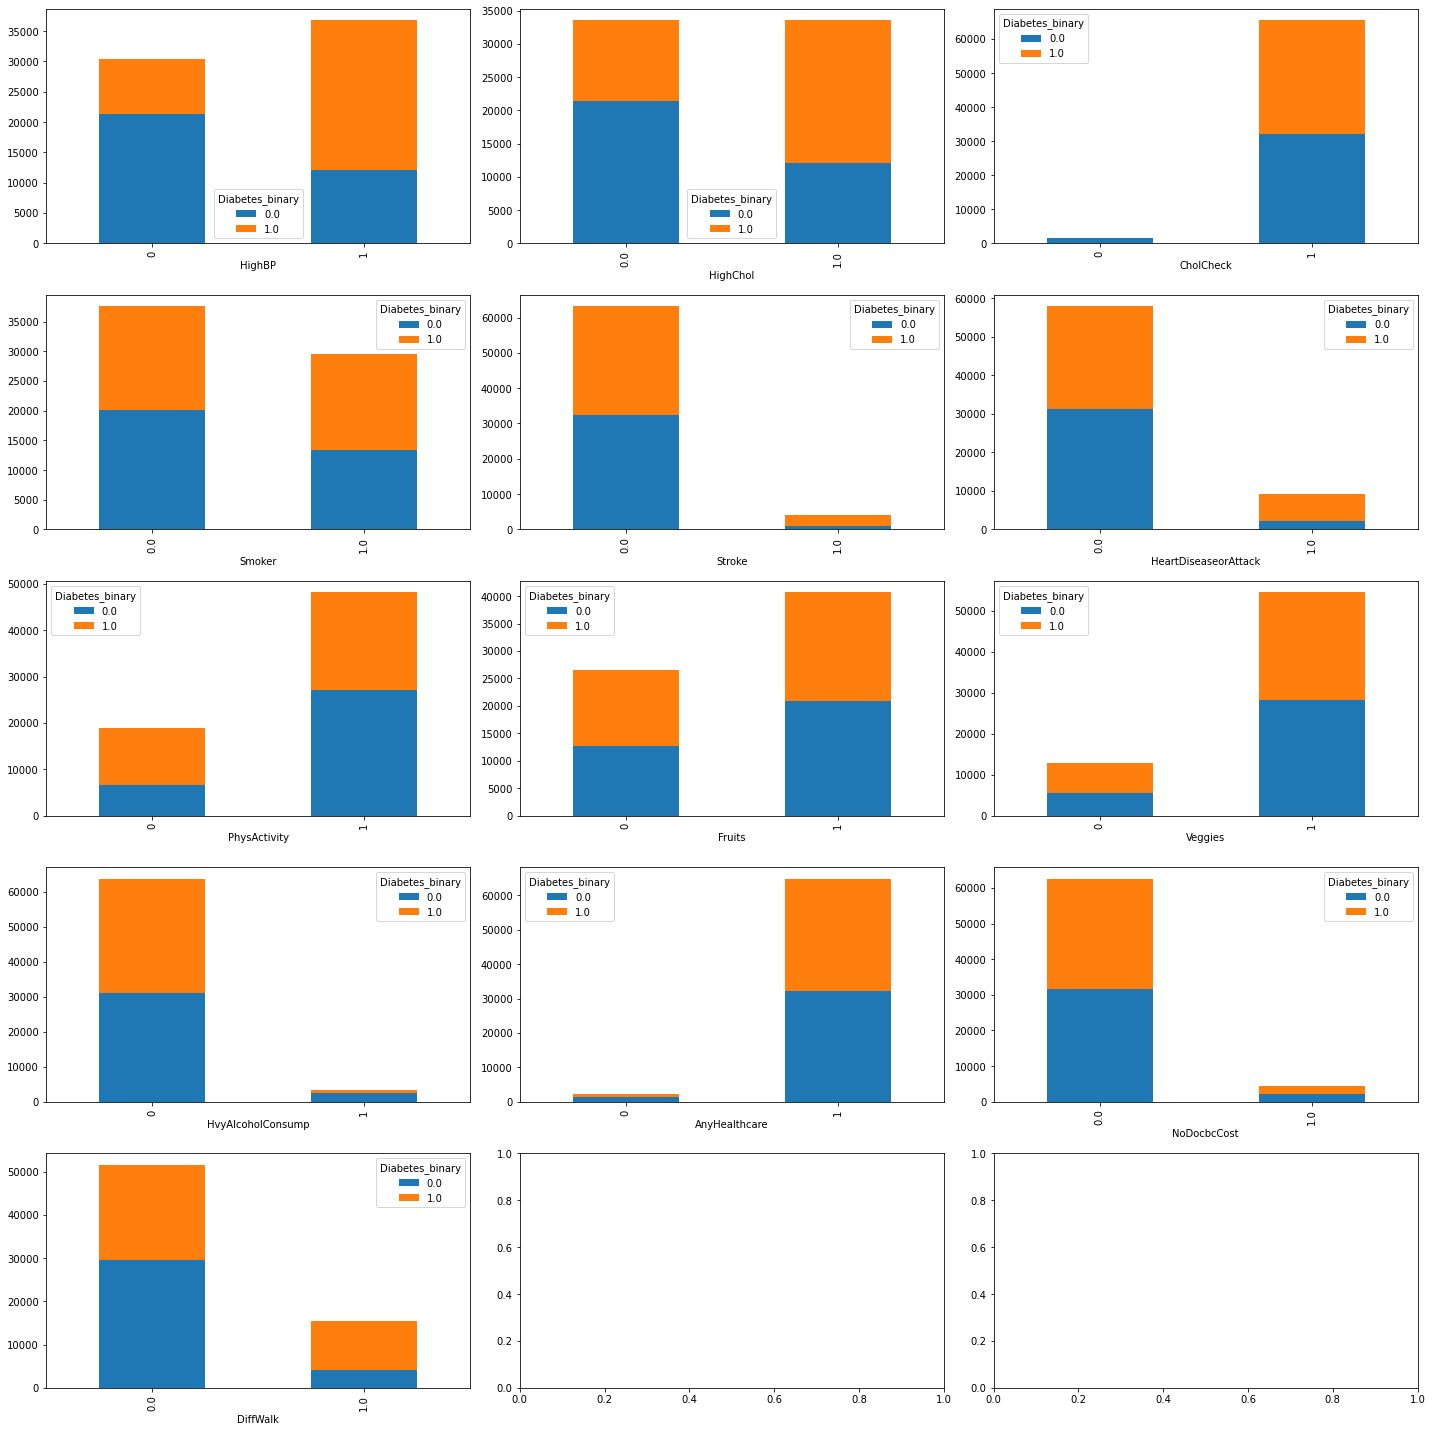

In [151]:
cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Create function to create a pivot table for the specified x_column and 'Diabetes_binary' columns.
def create_plot_pivot(df, x_column):
    # pivot table that you use to create a stacked bar chart.
    # count the frequency of x_column and diabetes_binary
    # resets the index of the resulting grouped DataFrame, to be regular column
    # This creates a pivot table with 'Diabetes_binary' as columns, x_column as index, and the calculated size (count) as values.
    _df_plot = df.groupby([x_column, 'Diabetes_binary']).size() \
        .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

fig, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df, cols[i]).plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_xlabel(cols[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

    

The plot of HighBP, HighChol, and CholCheck, suggest that a higher proportion of diabetes patients are happened to people who are accompanied by high blood pressure, and high cholesterol, and regularly check for cholesterol. 
Surprisingly,  the risk of diabetes appears comparable between non-smokers and smokers, with non-smokers exhibiting a slightly higher prevalence of diabetes, similar to individuals who have experienced a heart attack. Interestingly, individuals with heavy alcohol consumption show a lower likelihood of developing diabetes. 
Additionally, those who consume fewer fruits and vegetables and engage in less regular physical activity are also associated with a decreased likelihood of diabetes.


## Model Buidling 

### Splitting Data into Train and Test

In [4]:
X = df.drop('Diabetes_binary', axis=1)
y= df['Diabetes_binary']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

### Normalizing Data 

In [5]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

### Logistic Regression 

In [6]:
# Logistic Regression training model
logreg = LogisticRegression().fit(X_train_sc, y_train)

In [7]:
# Model evaluation using test data 
y_pred = logreg.predict(X_test_sc)

In [8]:
accuracy_score(y_pred, y_test)

0.7461893649769128

In [9]:
confusion_matrix(y_test, y_pred)

array([[7294, 2668],
       [2444, 7735]], dtype=int64)

In [10]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74      9738
         1.0       0.76      0.74      0.75     10403

    accuracy                           0.75     20141
   macro avg       0.75      0.75      0.75     20141
weighted avg       0.75      0.75      0.75     20141



In [11]:
train_accuracy_lr = cross_val_score(logreg, X_train_sc, y_train, cv=5).mean()
test_accuracy_lr = cross_val_score(logreg, X_test_sc, y_test, cv=5).mean()
print("Train Data Cross Validation Score : ", train_accuracy_lr)
print("Test Data Cross Validation Score : ", test_accuracy_lr)

Train Data Cross Validation Score :  0.7396957123098202
Test Data Cross Validation Score :  0.7458914059759889


In [12]:
accuracy_results = {}

In [13]:
accuracy_results["Logistic_Regression_Accuracy"] = test_accuracy_lr 

### Random Forest 

In [14]:
model_rf = RandomForestClassifier().fit(X_train_sc, y_train)

In [20]:
y_pred_2 = model_rf.predict(X_test_sc)

In [21]:
accuracy_score(y_pred_2, y_test)

0.7335286232063949

In [22]:
confusion_matrix(y_test, y_pred_2)

array([[6982, 2980],
       [2387, 7792]], dtype=int64)

In [23]:
print(classification_report(y_pred_2, y_test))

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72      9369
         1.0       0.77      0.72      0.74     10772

    accuracy                           0.73     20141
   macro avg       0.73      0.73      0.73     20141
weighted avg       0.74      0.73      0.73     20141



In [24]:
train_accuracy_rf = cross_val_score(model_rf, X_train_sc, y_train, cv=5).mean()
test_accuracy_rf = cross_val_score(model_rf, X_test_sc, y_test, cv=5).mean()
print("Train Data Cross Validation Score : ", train_accuracy_rf)
print("Test Data Cross Validation Score : ", test_accuracy_rf)

Train Data Cross Validation Score :  0.7299925523991914
Test Data Cross Validation Score :  0.7393372971478134


In [25]:
accuracy_results["Random_Forest_Accuracy"] = test_accuracy_rf

### Decision Tree 

In [26]:
model_tree = DecisionTreeClassifier().fit(X_train_sc, y_train)

In [27]:
y_pred_3 = model_tree.predict(X_test_sc)

In [28]:
accuracy_score(y_pred_3, y_test)

0.6506628270691625

In [29]:
confusion_matrix(y_test, y_pred_3)

array([[6520, 3442],
       [3594, 6585]], dtype=int64)

In [30]:
print(classification_report(y_pred_3, y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.64      0.65     10114
         1.0       0.65      0.66      0.65     10027

    accuracy                           0.65     20141
   macro avg       0.65      0.65      0.65     20141
weighted avg       0.65      0.65      0.65     20141



In [31]:
train_accuracy_tree = cross_val_score(model_tree, X_train_sc, y_train, cv=5).mean()
test_accuracy_tree = cross_val_score(model_tree, X_test_sc, y_test, cv=5).mean()
print("Train Data Cross Validation Score : ", train_accuracy_tree)
print("Test Data Cross Validation Score : ", test_accuracy_tree)

Train Data Cross Validation Score :  0.642940738376423
Test Data Cross Validation Score :  0.6539396968798455


In [32]:
accuracy_results["Decision_Tree_Accuracy"] = test_accuracy_tree

### KNN Model 

In [33]:
model_knn = KNeighborsClassifier().fit(X_train_sc, y_train)

In [34]:
y_pred_4 = model_knn.predict(X_test_sc)

In [35]:
accuracy_score(y_pred_4, y_test)

0.7067176406335336

In [36]:
confusion_matrix(y_test, y_pred_4)

array([[6824, 3138],
       [2769, 7410]], dtype=int64)

In [37]:
print(classification_report(y_pred_4, y_test))

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      9593
         1.0       0.73      0.70      0.72     10548

    accuracy                           0.71     20141
   macro avg       0.71      0.71      0.71     20141
weighted avg       0.71      0.71      0.71     20141



In [38]:
train_accuracy_knn = cross_val_score(model_knn, X_train_sc, y_train, cv=5).mean()
test_accuracy_knn = cross_val_score(model_knn, X_test_sc, y_test, cv=5).mean()
print("Train Data Cross Validation Score : ", train_accuracy_knn)
print("Test Data Cross Validation Score : ", test_accuracy_knn)

Train Data Cross Validation Score :  0.7007553995105862
Test Data Cross Validation Score :  0.7069162671919547


In [39]:
accuracy_results["KNN_Accuracy"] = test_accuracy_knn

## Model Comparison 

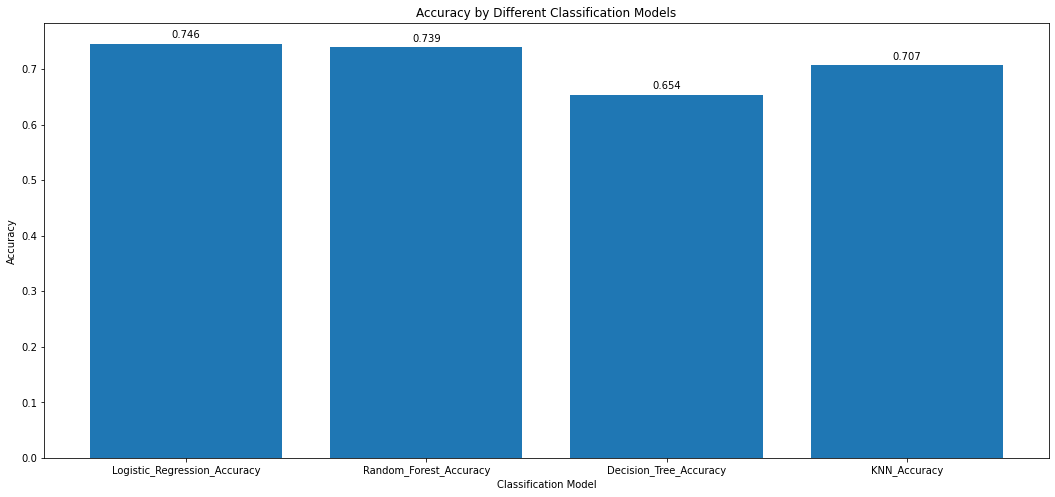

In [40]:
# All the test accuracy results stored in the accuracy_results
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Plot the graph with respective accuracy 
plt.figure(figsize=(18,8))
plt.bar(model_names, accuracy_values)
plt.title('Accuracy by Different Classification Models')
plt.ylabel('Accuracy')
plt.xlabel('Classification Model')

# enumerate function is used to iterate over each value (v) in accuracy_values along with its corresponding index (i)
for i, v in enumerate(accuracy_values):
    #  a text label is placed at position (i, v + 0.01) 
    plt.text(i, v + 0.01, "{:.3f}".format(v), ha='center', color='black')
plt.show()

From the graph, we can conclude that the most accurate classification model is the Logistic Regression model that attained 0.746 of high accuracy in predicting the diabetes status. 